Least-squares solution to $\mathbf{Ax} = \mathbf{b}$ with `numpy.linalg.lstsq`. 

The case of quadratic polynomial.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Imports

In [3]:
import sys
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

In [4]:
ROOT_DIR = '..'
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

import faai

In [5]:
poly = faai.NoisyPolynomial([1, 2, 3], normal_std=5., step=0.5, random_state=4)

In [6]:
poly.A

array([[ 1.  , -5.  , 25.  ],
       [ 1.  , -4.5 , 20.25],
       [ 1.  , -4.  , 16.  ],
       [ 1.  , -3.5 , 12.25],
       [ 1.  , -3.  ,  9.  ],
       [ 1.  , -2.5 ,  6.25],
       [ 1.  , -2.  ,  4.  ],
       [ 1.  , -1.5 ,  2.25],
       [ 1.  , -1.  ,  1.  ],
       [ 1.  , -0.5 ,  0.25],
       [ 1.  ,  0.  ,  0.  ],
       [ 1.  ,  0.5 ,  0.25],
       [ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  4.5 , 20.25]])

In [7]:
poly.b

array([66.25280854, 55.24975667, 36.02045534, 34.21799254, 19.9084924 ,
        6.82711382,  5.76146616,  7.74287587,  3.66125016, -4.98738316,
        4.09334845,  2.31006536,  8.12536198, 12.41126573, 11.2159187 ,
       26.50498577, 30.96556358, 52.48489665, 60.61670804, 70.98067784])

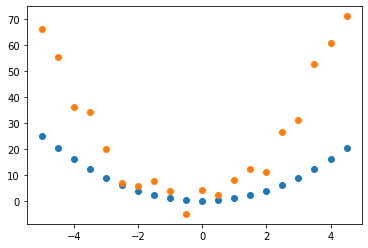

In [8]:
plt.scatter(poly.A[:, 1], poly.A[:, 2])
plt.scatter(poly.A[:, 1], poly.b)
plt.show()

In [9]:
x, residuals, rank, s = np.linalg.lstsq(poly.A, poly.b, rcond=None)

print(x)

print(np.polyfit(poly.A[:, 1], poly.b, deg=2))

[0.11660519 2.3810754  3.10410086]
[3.10410086 2.3810754  0.11660519]
